<h3>Primo test, senza FE</h3>
<ul>
<li>OneHot delle due features categoriche
<li>StandardScaler
<li>Regressione Logistica multinomiale

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# 1) Caricamento dati
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fertilizer/data/train.csv')
test  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fertilizer/data/test.csv')

# 2) Split train/test e target
X_train = train.drop(['id', 'Fertilizer Name'], axis=1)
y_train = train['Fertilizer Name']
X_test  = test.drop('id', axis=1)

# 3) Definizione feature
categorical_features = ['Soil Type', 'Crop Type']
numeric_features     = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']

# 4) Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features),
    ('num', StandardScaler(), numeric_features),
])

# 5) Pipeline con Logistic Regression multinomiale
pipeline = Pipeline([
    ('pre', preprocessor),
    ('clf', LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        max_iter=1000,
        random_state=42
    ))
])

# 6) Fit del modello
pipeline.fit(X_train, y_train)

# 7) Predizioni di probabilità sul test set
proba = pipeline.predict_proba(X_test)
classes = pipeline.named_steps['clf'].classes_

# 8) Estrazione top-3 per MAP@3
top3_idx = np.argsort(proba, axis=1)[:, -3:][:, ::-1]
preds = [' '.join(classes[idxs]) for idxs in top3_idx]

# 9) Creazione file di submission
submission = pd.DataFrame({
    'id': test['id'],
    'Fertilizer Name': preds
})
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/fertilizer/data/submission_v1_LRM.csv', index=False)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


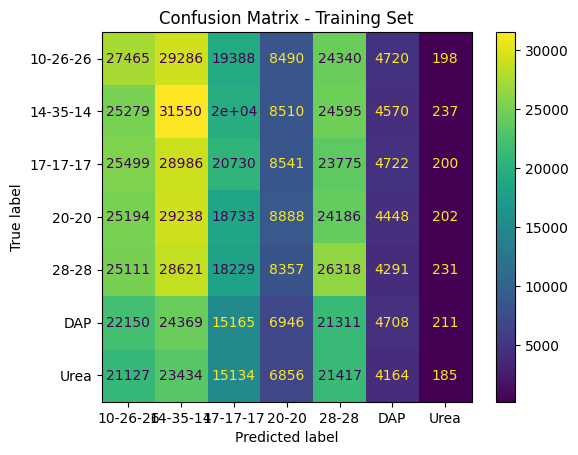

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# predizioni sul training set
y_pred = pipeline.predict(X_train)

# calcolo e visualizzazione della confusione
cm = confusion_matrix(y_train, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.title("Confusion Matrix - Training Set")
plt.show()


Risultato ---> 0.29133